<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Code-along: Data Visualisation in Python

## Useful links

[Link to pandas plot documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

[Effective Matplotlib](http://pbpython.com/effective-matplotlib.html)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

Increase default figure and font sizes for easier viewing

In [2]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Create fake data for examples

In [3]:
df = pd.DataFrame(np.random.randn(10, 4), 
                  columns=['col1', 'col2', 'col3', 'col4'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

df.head()

,col1,col2,col3,col4
a,-0.081147,0.602170,0.241787,-0.178035
b,1.147406,1.131973,0.785434,0.112082
c,-0.182991,0.291011,-0.424311,0.725803
d,-1.702433,-0.425232,-1.577974,-0.613363
e,-0.133021,-1.542274,0.941076,-0.166672


### Choosing the right type of visualisation

The choice of visualization should depend what you are trying to show. Here is a helpful flowchart that you can use to determine the best type of visualizations.

![Chart Suggestions](assets/images/chart_suggestions.png)

### Load in data sets for visualisation examples

In [4]:
# Read in the drinks data.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = 'datasets/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

# Read in the ufo data.
ufo = pd.read_csv('datasets/ufo.csv')

## Line plots: Show the trend of a numerical variable over time

For plotting time, we need date columns.

In [5]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [6]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

Convert to date

In [7]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [8]:
ufo["Time"] = pd.to_datetime(ufo["Time"], format="%m/%d/%Y %H:%M")
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [9]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

To know what to type in `format`, use [strftime.org](http://strftime.org)

Extract the year portion:

In [10]:
ufo["Year"] = ufo["Time"].dt.year
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


Count the number of ufo reports each year (and sort by year)

In [11]:
yearly_sightings = ufo["Year"].value_counts().sort_index()
yearly_sightings

1930       2
1931       2
1933       1
1934       1
1935       1
1936       2
1937       2
1939       3
1941       2
1942       3
1943       5
1944       8
1945       9
1946       8
1947      41
1948       9
1949      19
1950      31
1951      21
1952      52
1953      36
1954      55
1955      33
1956      46
1957      78
1958      53
1959      57
1960      67
1961      50
1962      72
        ... 
1985     211
1986     186
1987     210
1988     232
1989     247
1990     237
1991     220
1992     245
1993     292
1994     406
1995    1344
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
2001    2925
2002    2933
2003    3507
2004    3850
2005    3787
2006    3445
2007    4058
2008    4655
2009    4251
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: Year, Length: 82, dtype: int64

Most things in `pandas` can be plotted using `.plot()`

In [12]:
type(yearly_sightings)

pandas.core.series.Series

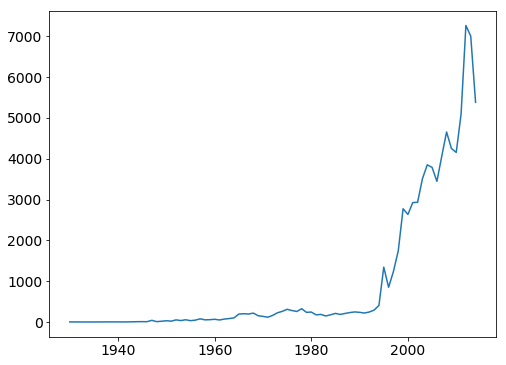

In [13]:
yearly_sightings.plot()

You'll notice the AxesSubplot text above your chart.

That's because matplotlib by default doesn't show visualisations until you tell it to,<br>**but Jupyter notebooks are an exception when you use `%matplotlib inline`**.

To get rid of that, you can force the code to show your plot with `plt.show()`

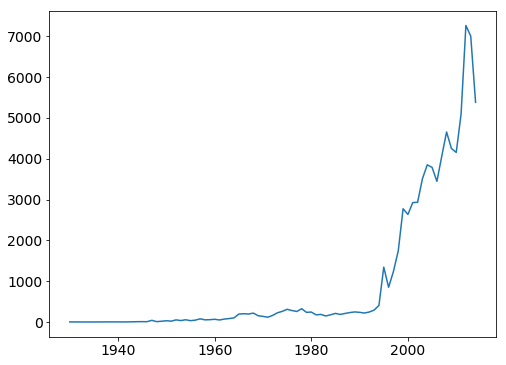

In [14]:
yearly_sightings.plot()

plt.show()

### Don't use line charts for non-time data!!!

In [15]:
drinks["continent"].value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

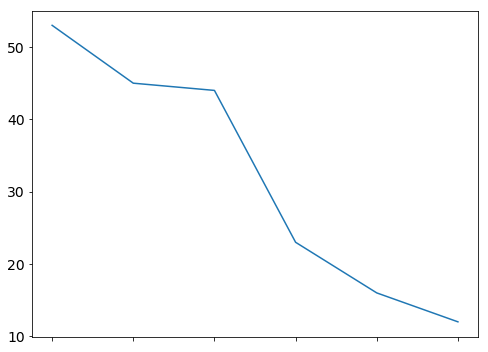

In [16]:
drinks["continent"].value_counts().plot()

### Use bars instead:

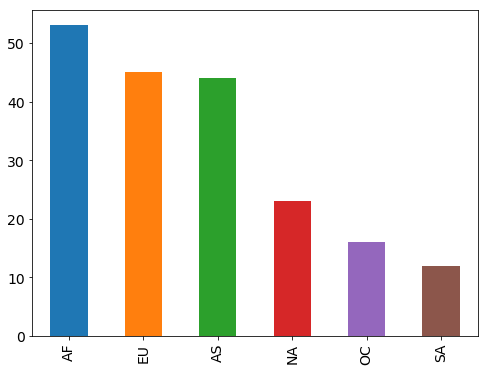

In [17]:
drinks["continent"].value_counts().plot(kind='bar')

Or horizontal bar chart

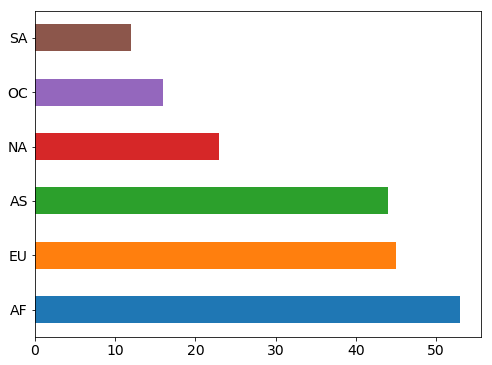

In [18]:
drinks["continent"].value_counts().plot(kind="barh")

For exploration, using the `.plot()` methods directly is absolutely fine.

For "publication-ready" plots you should add additional details like axis labels etc. and for this it is a good idea to get access to the underlying **figure** and **axes**.

You can use the following syntax to get access to them:

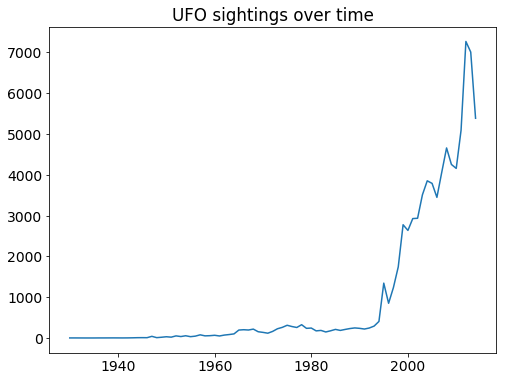

In [21]:
fig, axis = plt.subplots()

yearly_sightings.plot(ax=axis)

axis.set_title("UFO sightings over time")

plt.show()

### How to change the size of a plot

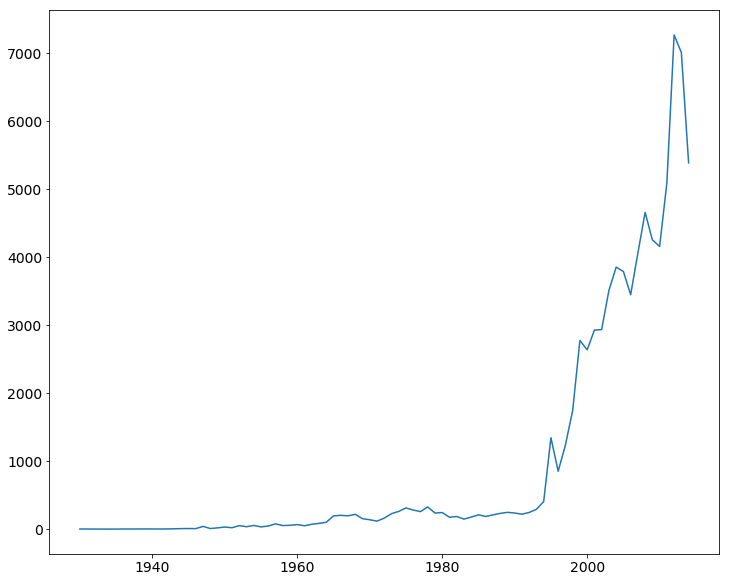

In [22]:
yearly_sightings.plot(figsize=(12, 10))

### How to change the colour of a plot

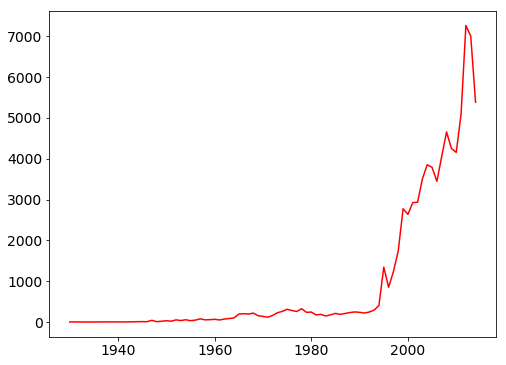

In [23]:
yearly_sightings.plot(color="red")

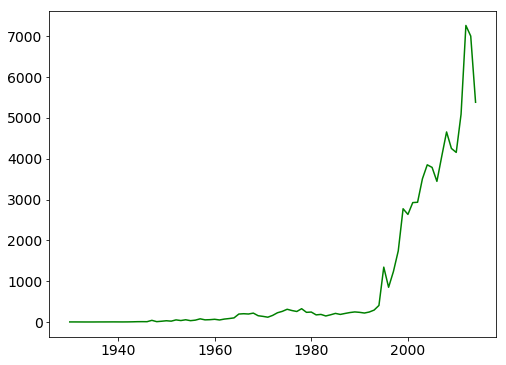

In [24]:
yearly_sightings.plot(c="g")

### How to change the style of individual lines

In [25]:
df[["col1", "col4"]]

,col1,col4
a,-0.081147,-0.178035
b,1.147406,0.112082
c,-0.182991,0.725803
d,-1.702433,-0.613363
e,-0.133021,-0.166672
f,-0.304757,0.759446
g,0.712221,0.592676
h,-0.911459,1.755689
i,1.024638,-0.406028
j,-0.713400,-0.227206


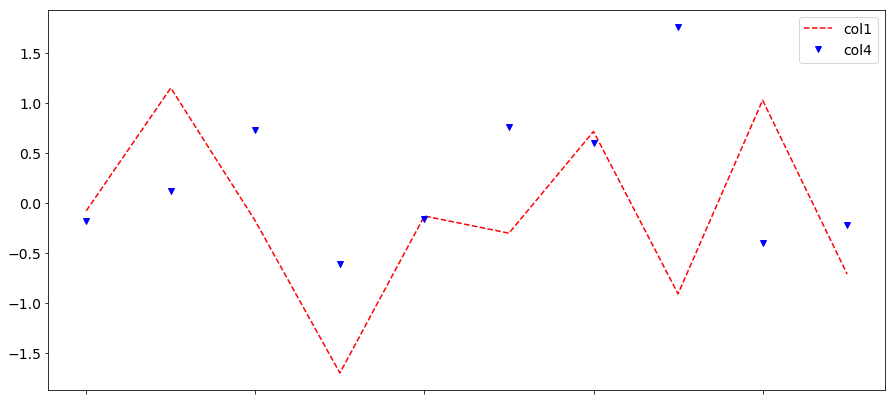

In [26]:
# -- is a dotted line, v is triangle_down
# r - red, b - blue
df[['col1', 'col4']].plot(figsize=(15,7), style={'col1': '--r', 'col4': 'vb'})

<a id="bar-plots"></a>
## Bar Plots: Show a numerical comparison across different categories
---

In [27]:
# Calculate the mean alcohol amounts for each continent.
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


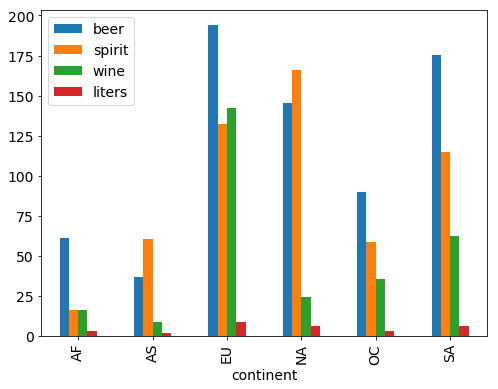

In [28]:
# Side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar')

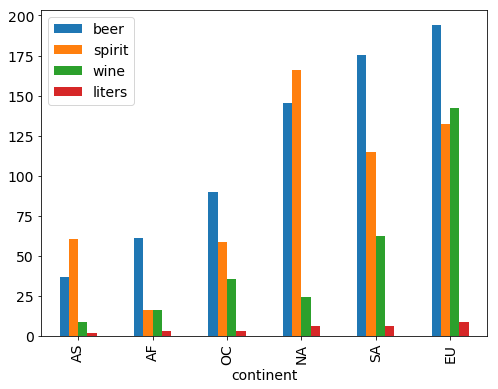

In [29]:
# Sort the continent x-axis by a particular column.
drinks.groupby('continent').mean().sort_values('beer').plot(kind='bar')

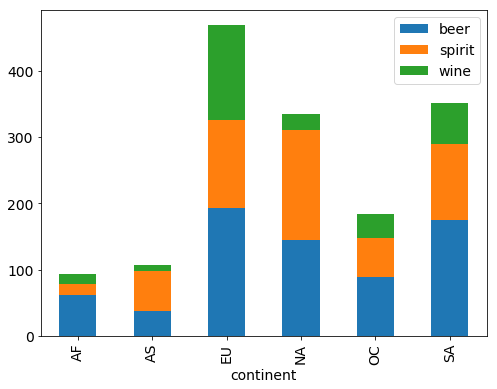

In [30]:
# Stacked bar plot (with the liters comparison removed!)
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True)

<a id="scatter-plots"></a>
## Scatter plots: Show the relationship between two numerical variables
---


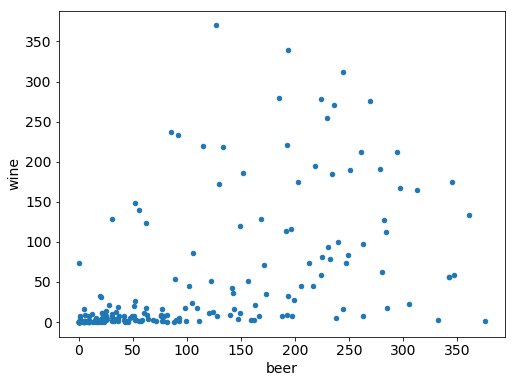

In [31]:
# Compare with scatter plot.
drinks.plot(kind='scatter', x='beer', y='wine')

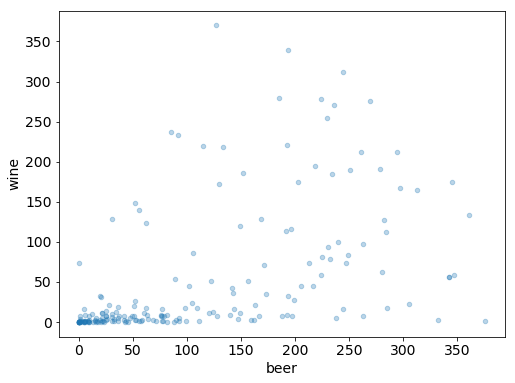

In [32]:
# Add transparency (great for plotting several graphs on top of each other, 
# or for illustrating density!).
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.3)

Vary point colour by spirit servings.

More info here: [https://matplotlib.org/users/colormaps.html](https://matplotlib.org/users/colormaps.html)

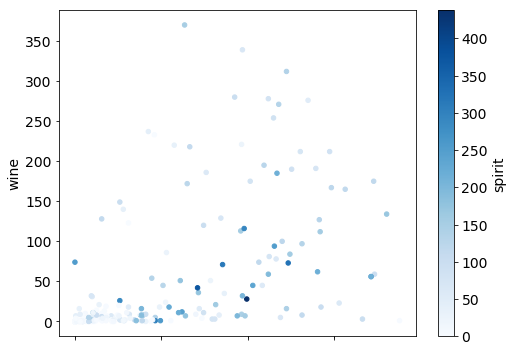

In [33]:
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues')

# Plotting best practices

For plots that are "publication ready" make sure they are:
- labelled (both axes and a title)
- big enough to be legible
- appropriately coloured
- scaled appropriately

## More on Matplotlib (Figures, Subplots, and Axes)

Matplotlib uses a blank canvas called a figure.

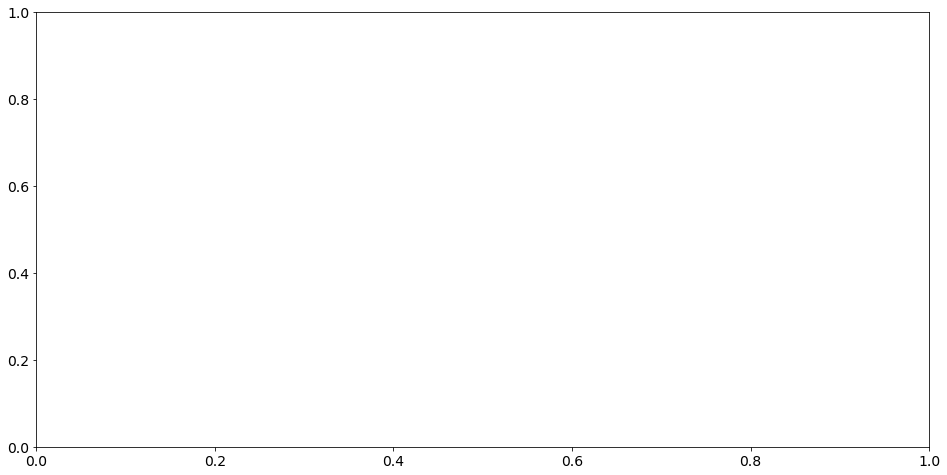

In [35]:
fig, ax = plt.subplots(figsize=(16,8))

Within this canvas, we can contain smaller objects called axes

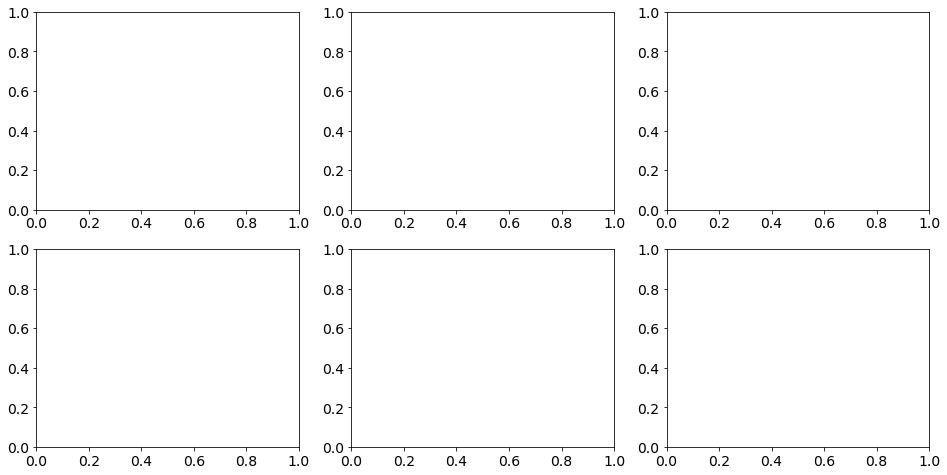

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(16,8))

Pandas allows us to plot to a specified axes if we pass the object to the ax parameter.

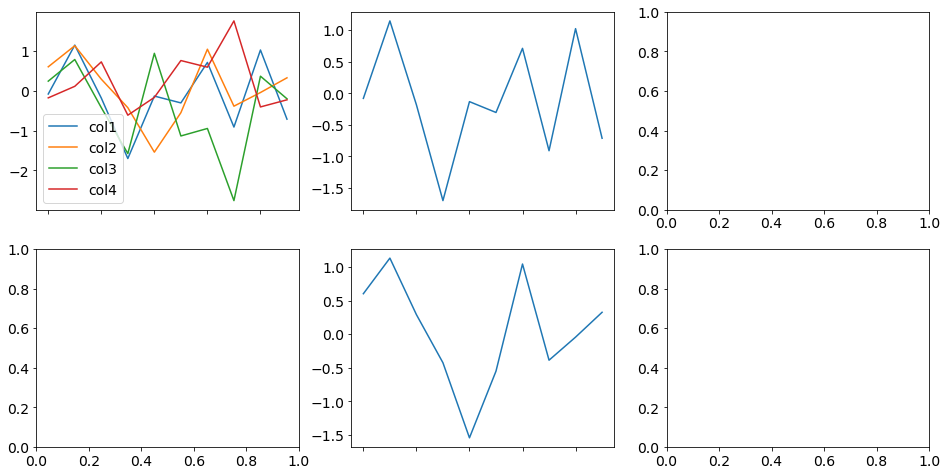

In [37]:
fig, axes = plt.subplots(2, 3, figsize=(16,8))

df.plot(ax=axes[0][0])

df['col1'].plot(ax=axes[0][1])

df['col2'].plot(ax=axes[1][1])

In [38]:
# List available plot styles
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [39]:
# Change to a different style.
plt.style.use('ggplot')

Try plotting again

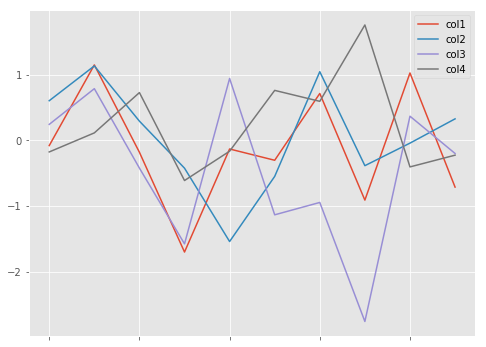

In [40]:
df.plot()

The best until last... xkcd plotting!

In [41]:
plt.xkcd()

<matplotlib.pyplot.xkcd.<locals>.dummy_ctx at 0x11794bf28>

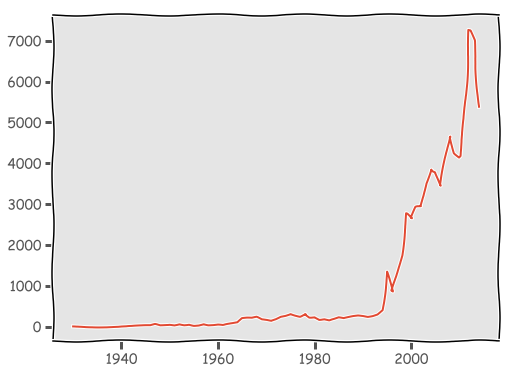

In [42]:
yearly_sightings.plot()